# В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту.

## Данные
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)

## Обязательное задание
1) Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

2) Аналогично исследовать скопления голосов за и против отдельно

3) Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия


In [263]:
import numpy as np
import pandas as pd

In [264]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [265]:
data = pd.read_csv('geo.csv', delimiter = ';', index_col = False)
data.head()

,Unnamed: 0,x,y,comment_class
0,0,"37,61","55,78",-1
1,1,"37,61","55,78",-1
2,2,"37,60","55,74",-1
3,3,"37,56","55,73",-1
4,4,"37,57","55,73",-1


In [266]:
df = pd.DataFrame(data, columns = ['x', 'y', 'comment_class'])
df.head()

,x,y,comment_class
0,"37,61","55,78",-1
1,"37,61","55,78",-1
2,"37,60","55,74",-1
3,"37,56","55,73",-1
4,"37,57","55,73",-1


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null object
y                108806 non-null object
comment_class    108806 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [268]:
cc = df['comment_class']
cc = list(cc)
cc[:5]

[-1, -1, -1, -1, -1]

In [269]:
x = list( map( lambda x: float(x.replace(',', '.')), list(df['x']) ) )
y = list( map( lambda x: float(x.replace(',', '.')), list(df['y']) ) )

In [270]:
y = list(df['y'])
y = list( map( lambda x: float(x.replace(',', '.')), list(df['y']) ) )

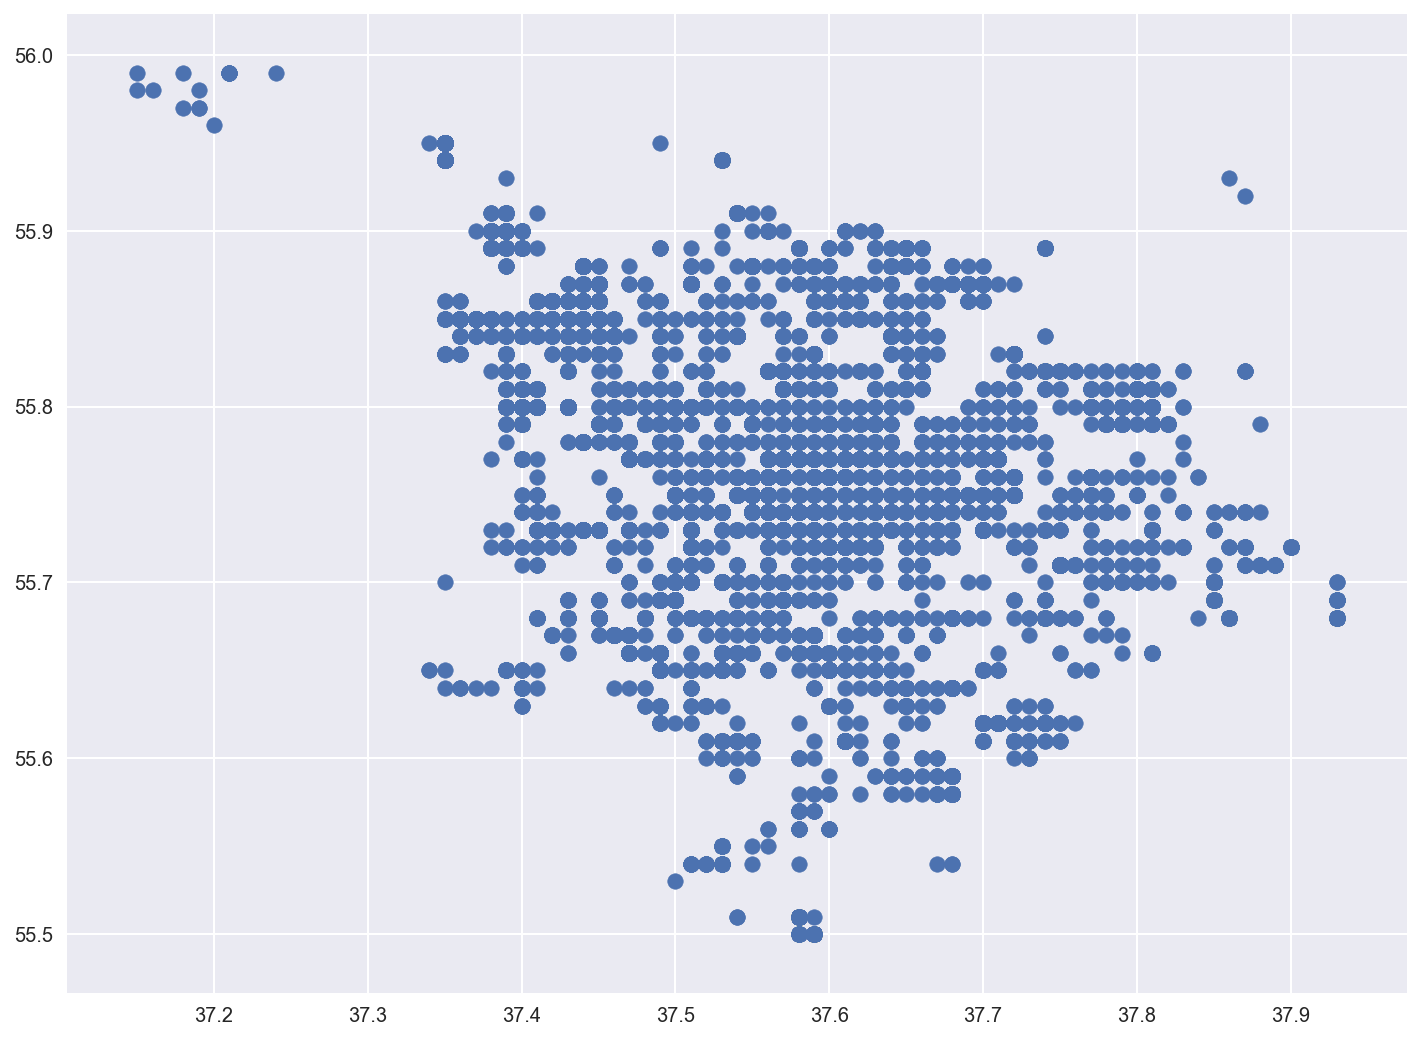

In [271]:
plt.scatter(x, y, s=60)

In [272]:
Z = list(map (lambda el: list(el), zip(x,y)))
Z[:5]

[[37.61, 55.78], [37.61, 55.78], [37.6, 55.74], [37.56, 55.73], [37.57, 55.73]]

In [273]:
len(Z)

108806

In [274]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

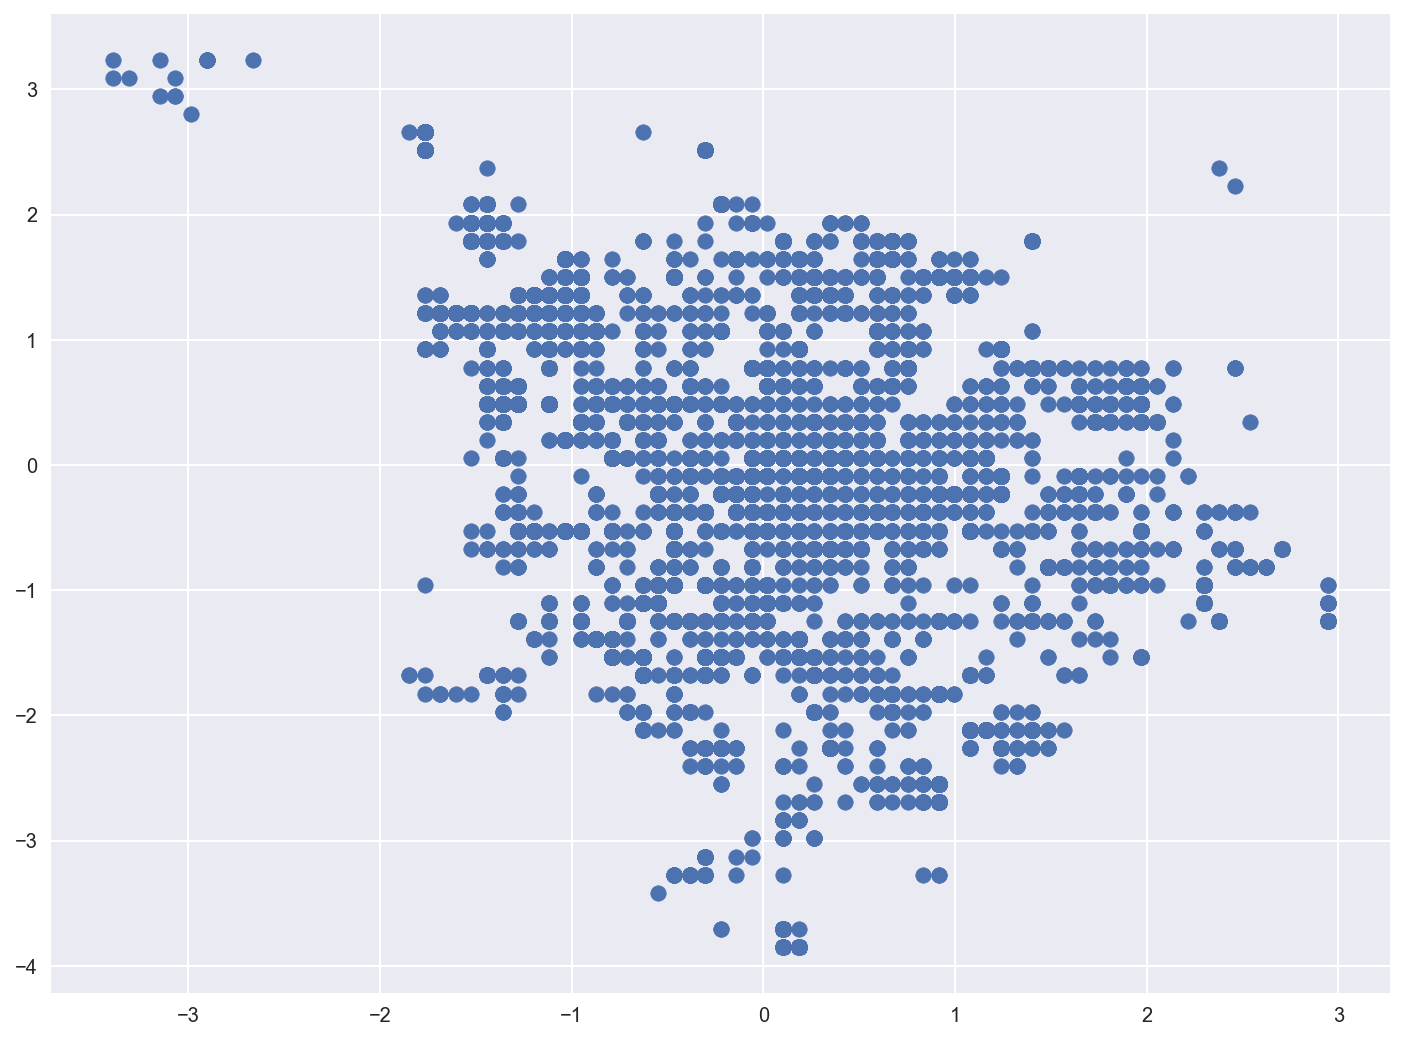

In [275]:
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], s=60);

In [276]:
from sklearn.cluster import KMeans

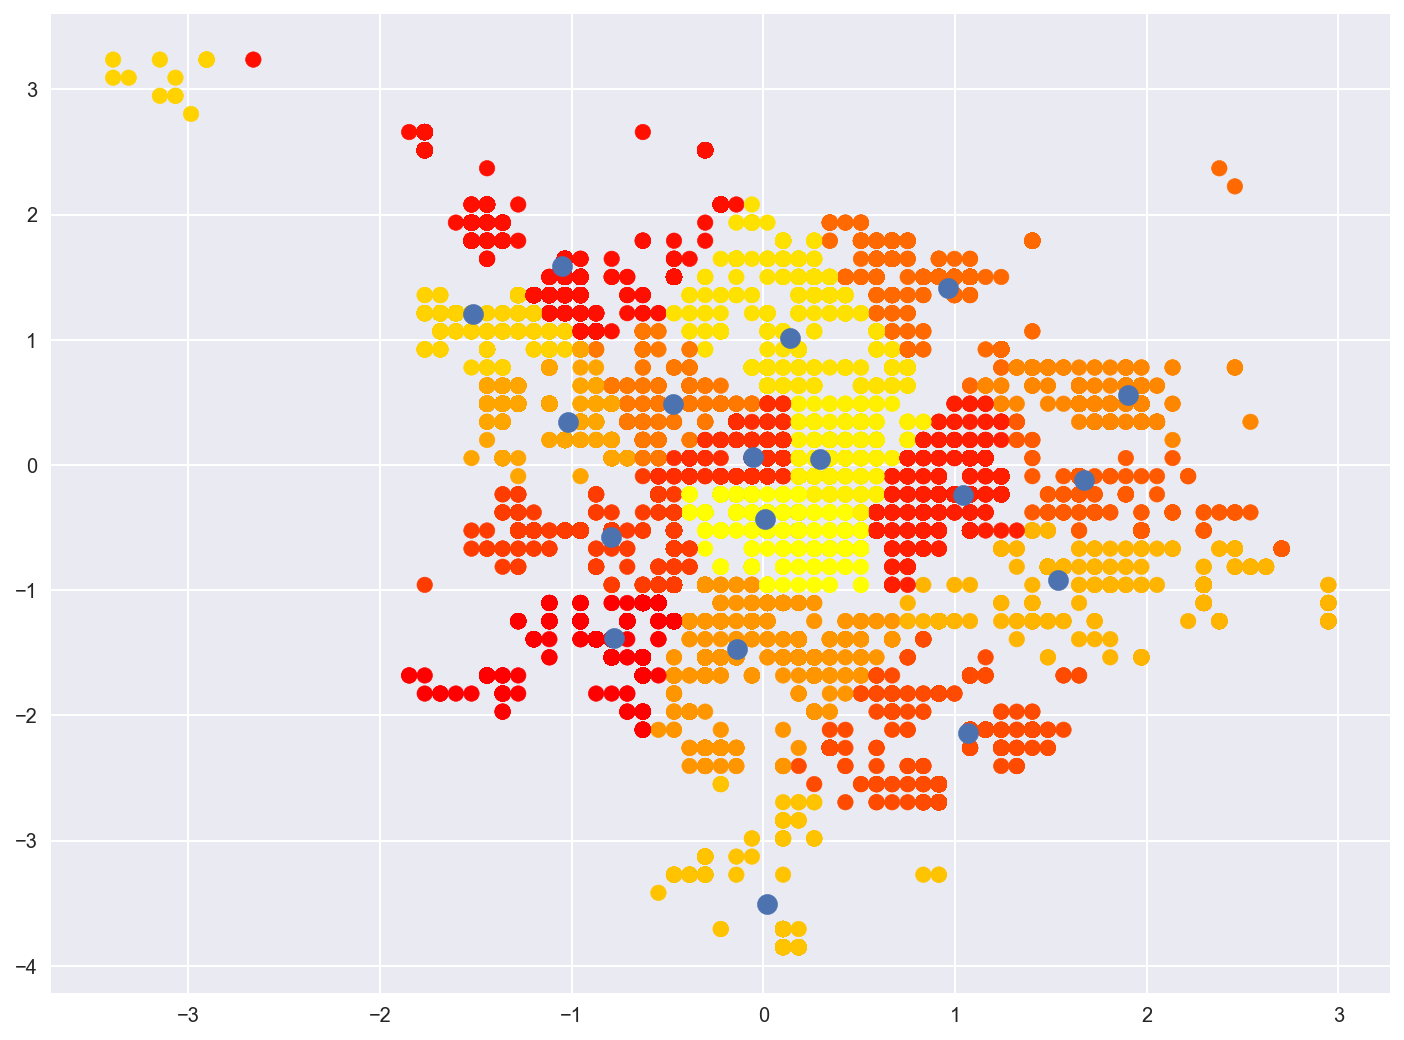

In [277]:
kmeans = KMeans(n_clusters=18)
kmeans_pred = kmeans.fit_predict(Z_scaled)
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=kmeans_pred, cmap='autumn', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100);

### Посмотрим как распределены x,y по голосам

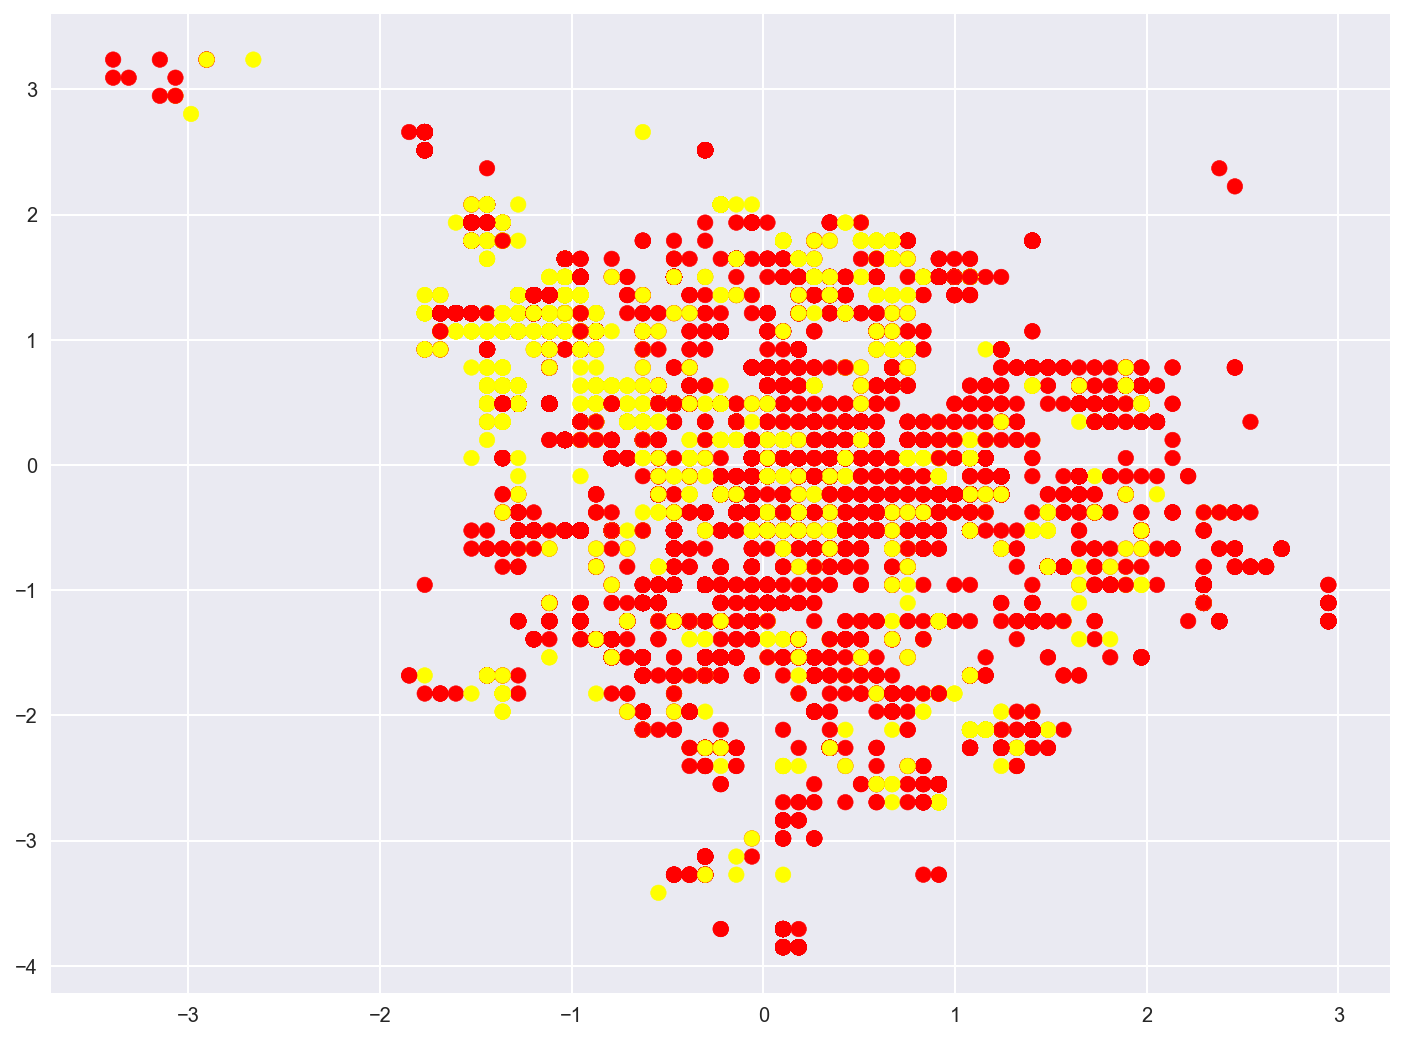

In [278]:
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=cc, cmap='autumn', s=60);

### Исследуем скопления голосов против

In [279]:
x = list(df[df['comment_class'] == -1]['x'])
x = list( map( lambda x: float(x.replace(',', '.')), x ) )
y = list(df[df['comment_class'] == -1]['y'])
y = list( map( lambda x: float(x.replace(',', '.')), y ) )
Z = list(map (lambda el: list(el), zip(x,y)))
Z[:5]

[[37.61, 55.78], [37.61, 55.78], [37.6, 55.74], [37.56, 55.73], [37.57, 55.73]]

In [280]:
len(Z)

95147

In [281]:
Z_scaled = scaler.fit_transform(Z)

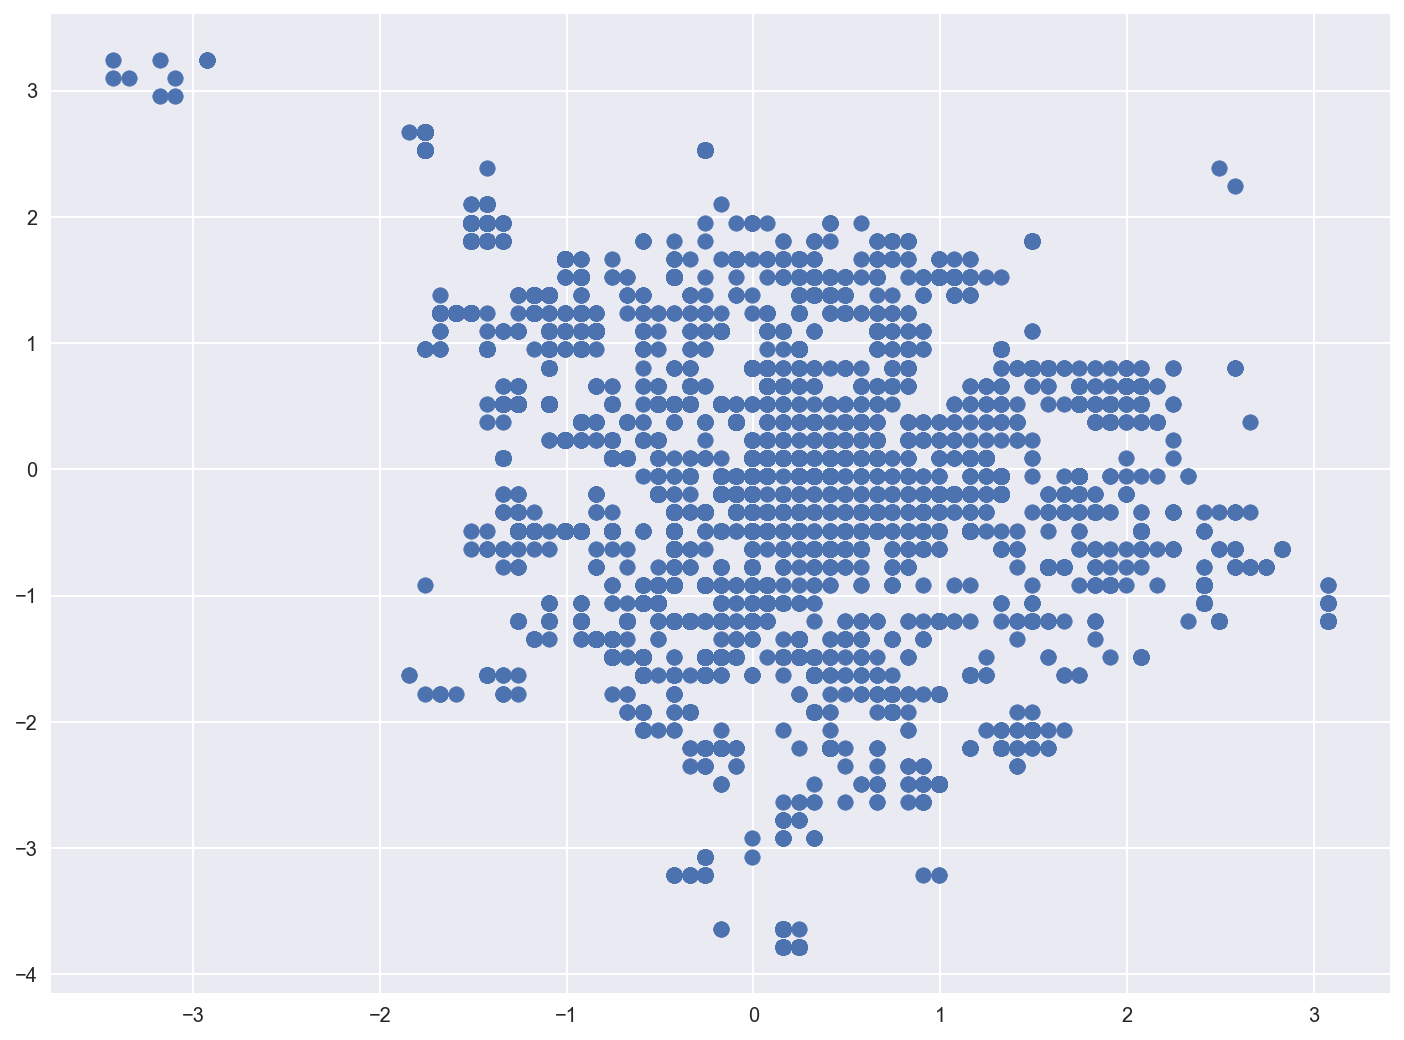

In [282]:
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], s=60);

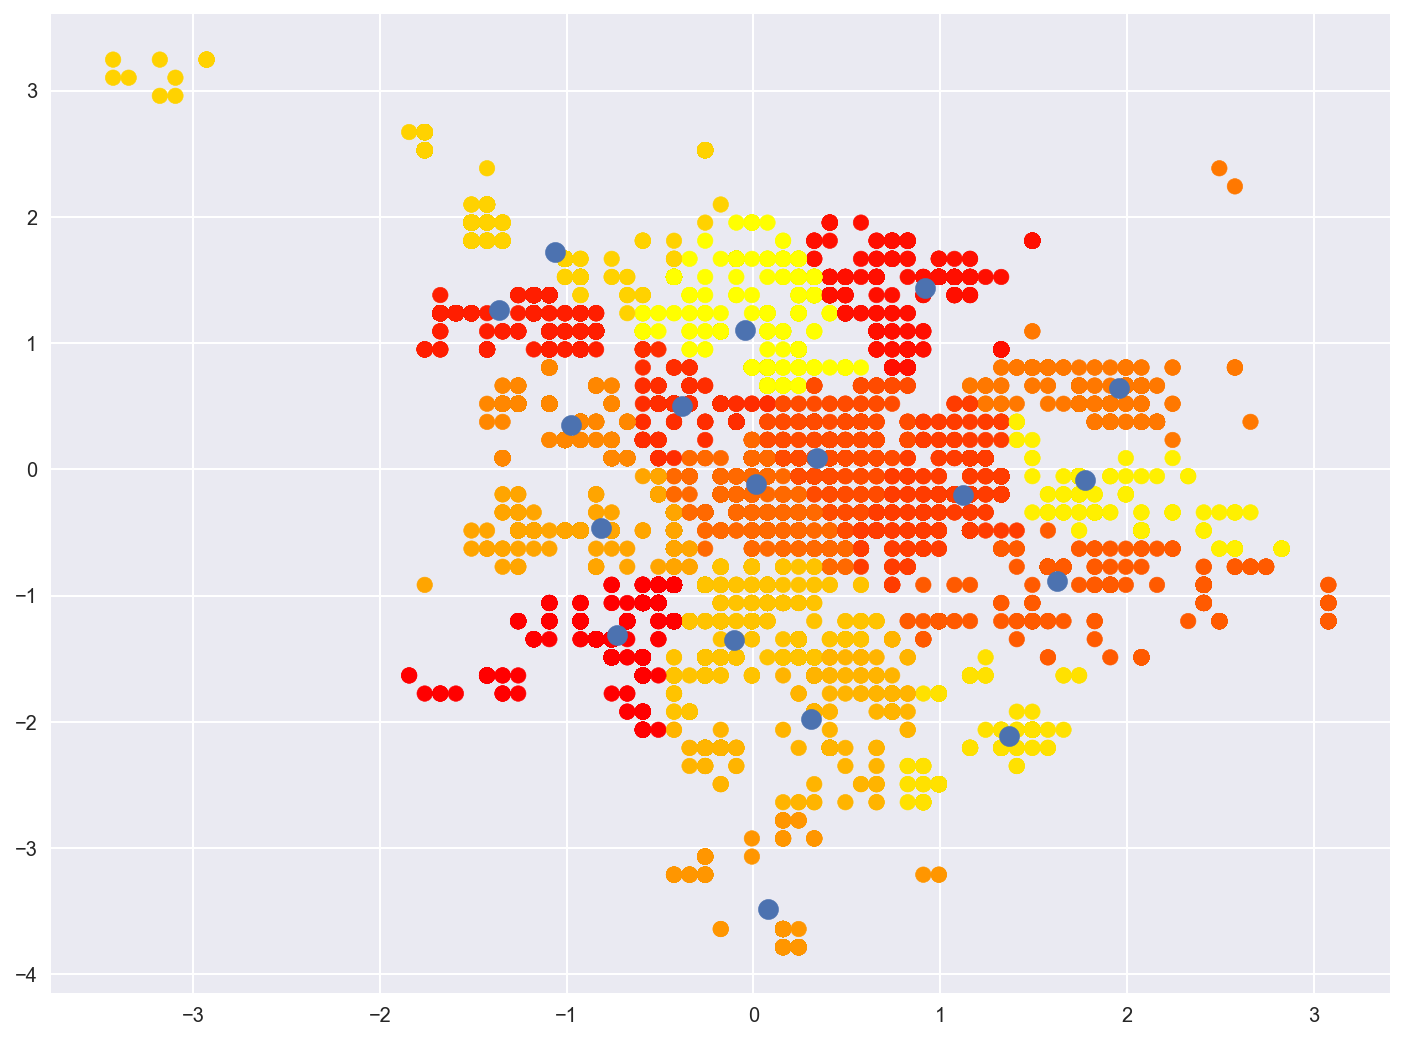

In [283]:
kmeans = KMeans(n_clusters=18)
kmeans_pred = kmeans.fit_predict(Z_scaled)
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=kmeans_pred, cmap='autumn', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100);

### Исследуем скопления голосов за

In [284]:
x = list(df[df['comment_class'] == 1]['x'])
x = list( map( lambda x: float(x.replace(',', '.')), x ) )
y = list(df[df['comment_class'] == 1]['y'])
y = list( map( lambda x: float(x.replace(',', '.')), y ) )
Z = list(map (lambda el: list(el),zip(x,y)))
len(Z)

13659

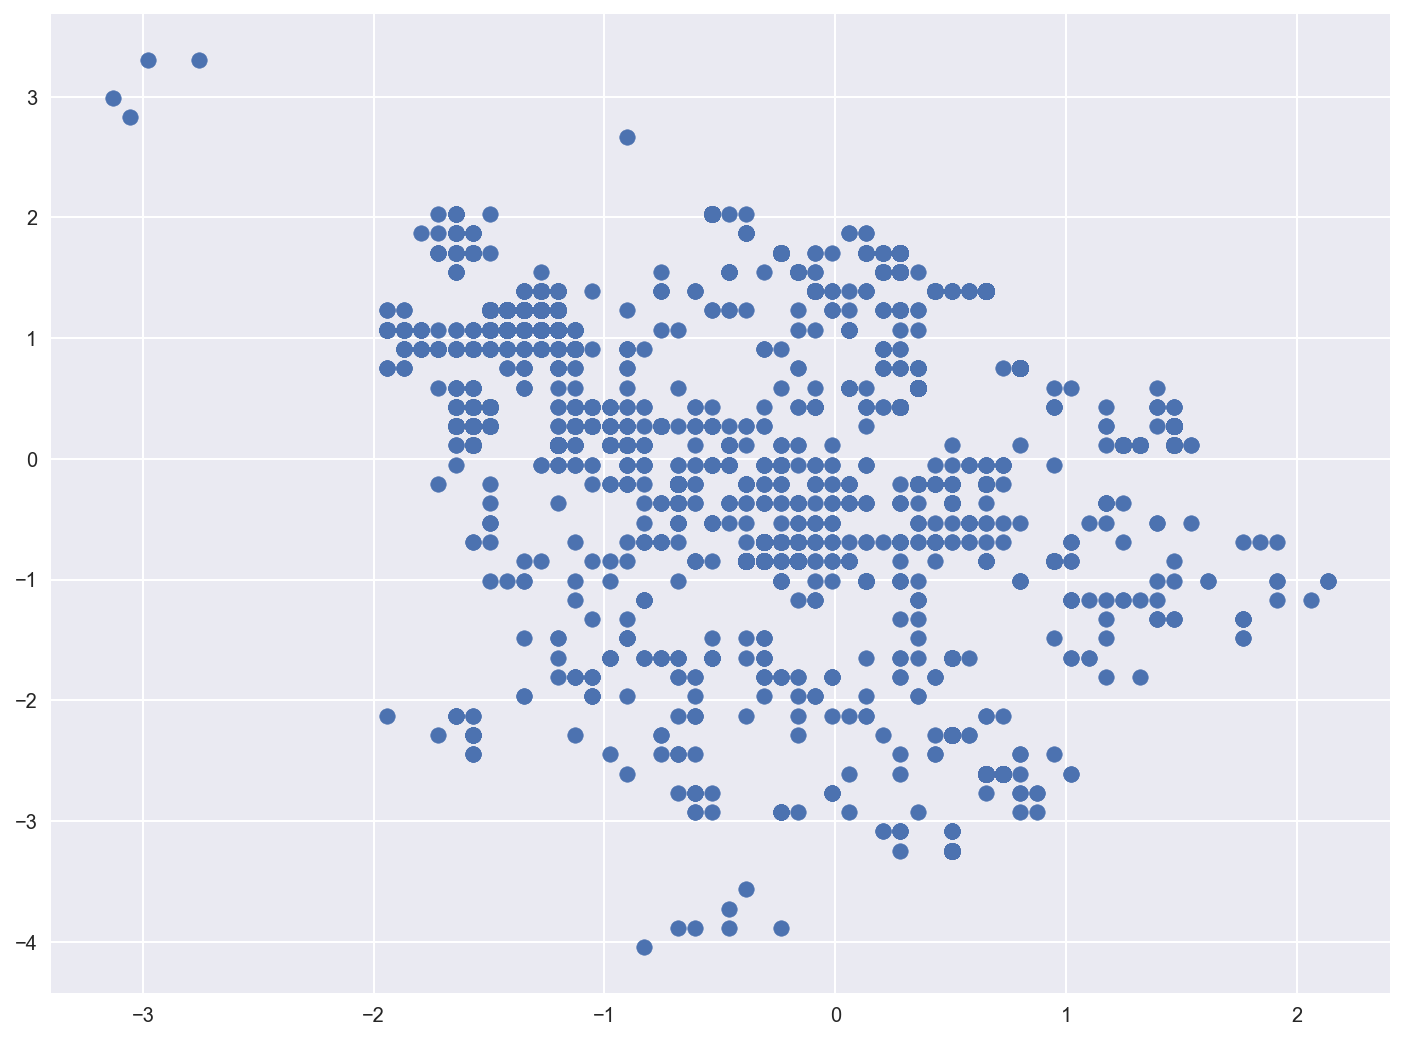

In [285]:
Z_scaled = scaler.fit_transform(Z)
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], s=60)

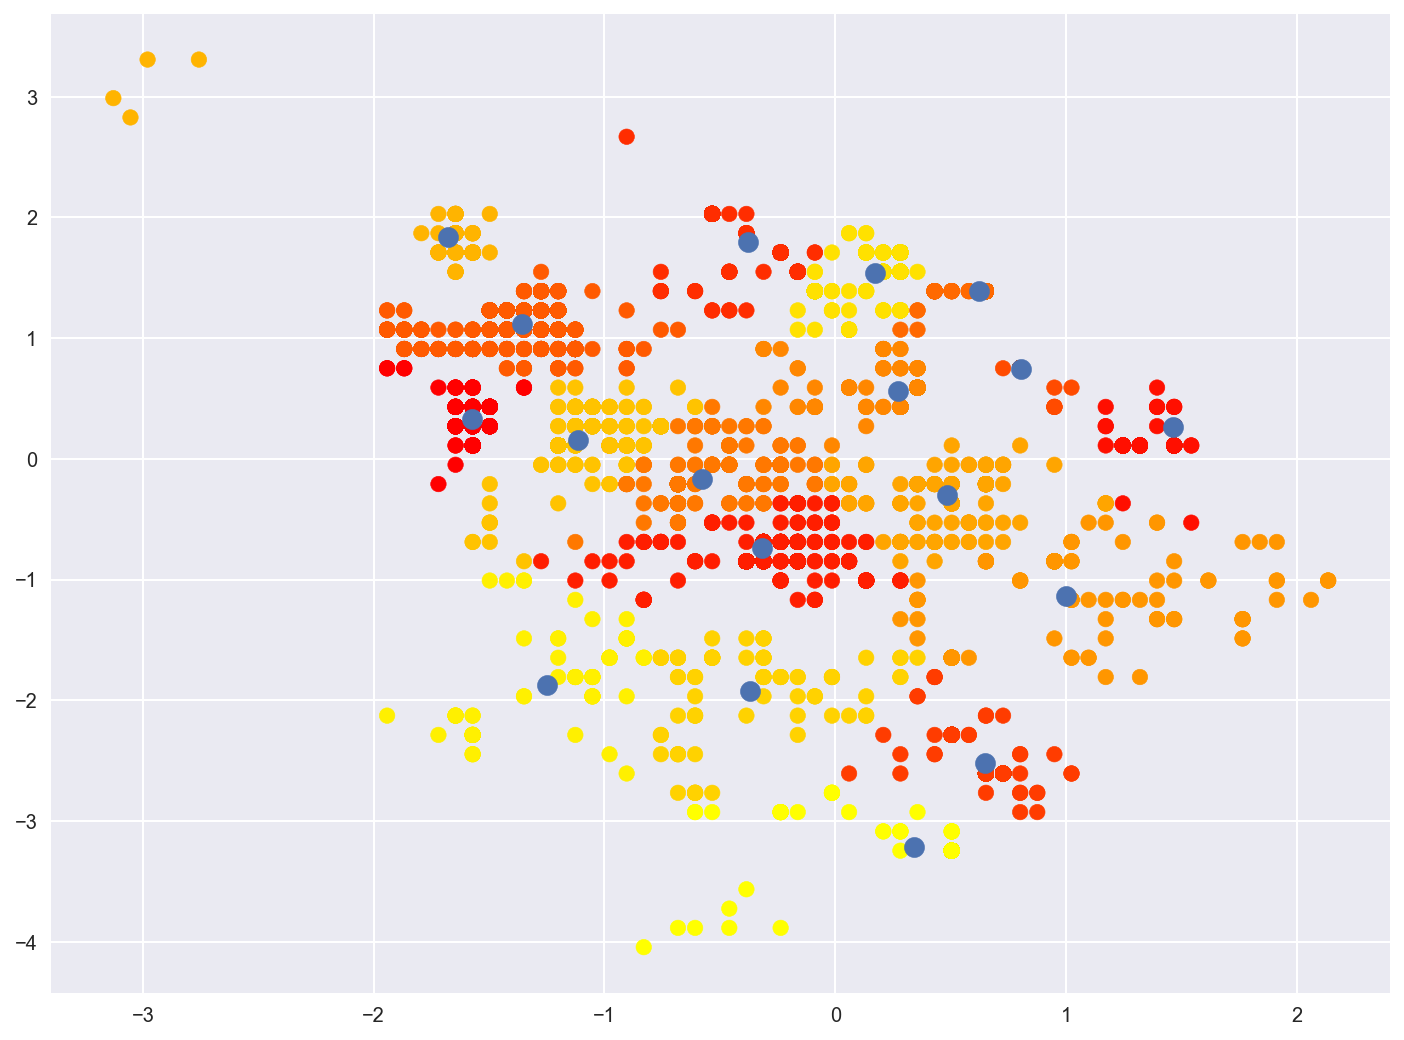

In [286]:
kmeans = KMeans(n_clusters=18)
kmeans_pred = kmeans.fit_predict(Z_scaled)
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=kmeans_pred, cmap='autumn', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100);

### Подберём оптимальное число кластеров для KMeans

In [253]:
k_inertia = []
ks = range(1, 60)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(Z_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

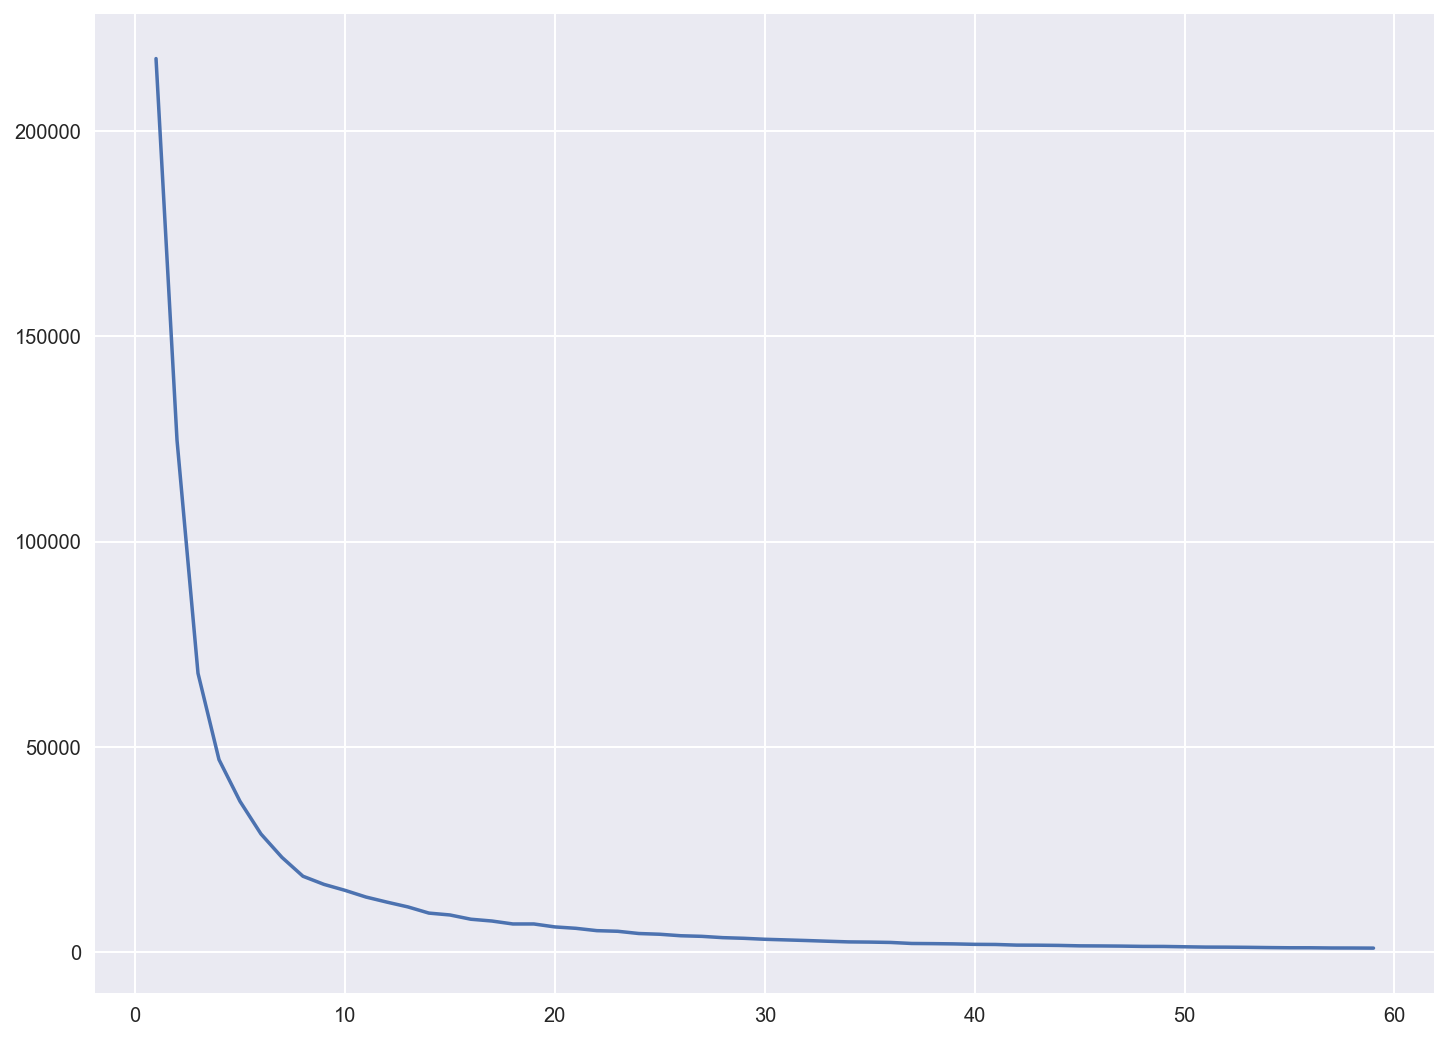

In [255]:
plt.plot(ks, k_inertia);

In [256]:
diff = np.diff(k_inertia)
diff

array([ -9.29081572e+04,  -5.67783278e+04,  -2.10182904e+04,
        -1.01543958e+04,  -7.95604632e+03,  -5.69971405e+03,
        -4.59211526e+03,  -1.97916210e+03,  -1.44913195e+03,
        -1.63237183e+03,  -1.23982694e+03,  -1.16769178e+03,
        -1.50448463e+03,  -4.55652215e+02,  -1.03983644e+03,
        -4.35507178e+02,  -7.17116551e+02,  -1.84517620e-01,
        -7.18331855e+02,  -3.39845245e+02,  -5.69162484e+02,
        -1.54602007e+02,  -5.43119332e+02,  -1.80106704e+02,
        -3.64087702e+02,  -1.45849363e+02,  -3.17525445e+02,
        -1.58005883e+02,  -2.38148997e+02,  -1.50778837e+02,
        -1.55600980e+02,  -1.71517096e+02,  -1.59796909e+02,
        -4.78274439e+01,  -8.60983159e+01,  -2.49746814e+02,
        -4.04667822e+01,  -5.98265889e+01,  -1.11256690e+02,
        -3.22570849e+01,  -1.57189919e+02,  -1.76780846e+01,
        -5.21012797e+01,  -1.05356072e+02,  -2.56739511e+01,
        -4.08178563e+01,  -6.77619046e+01,  -1.35465142e+01,
        -8.12914292e+01,

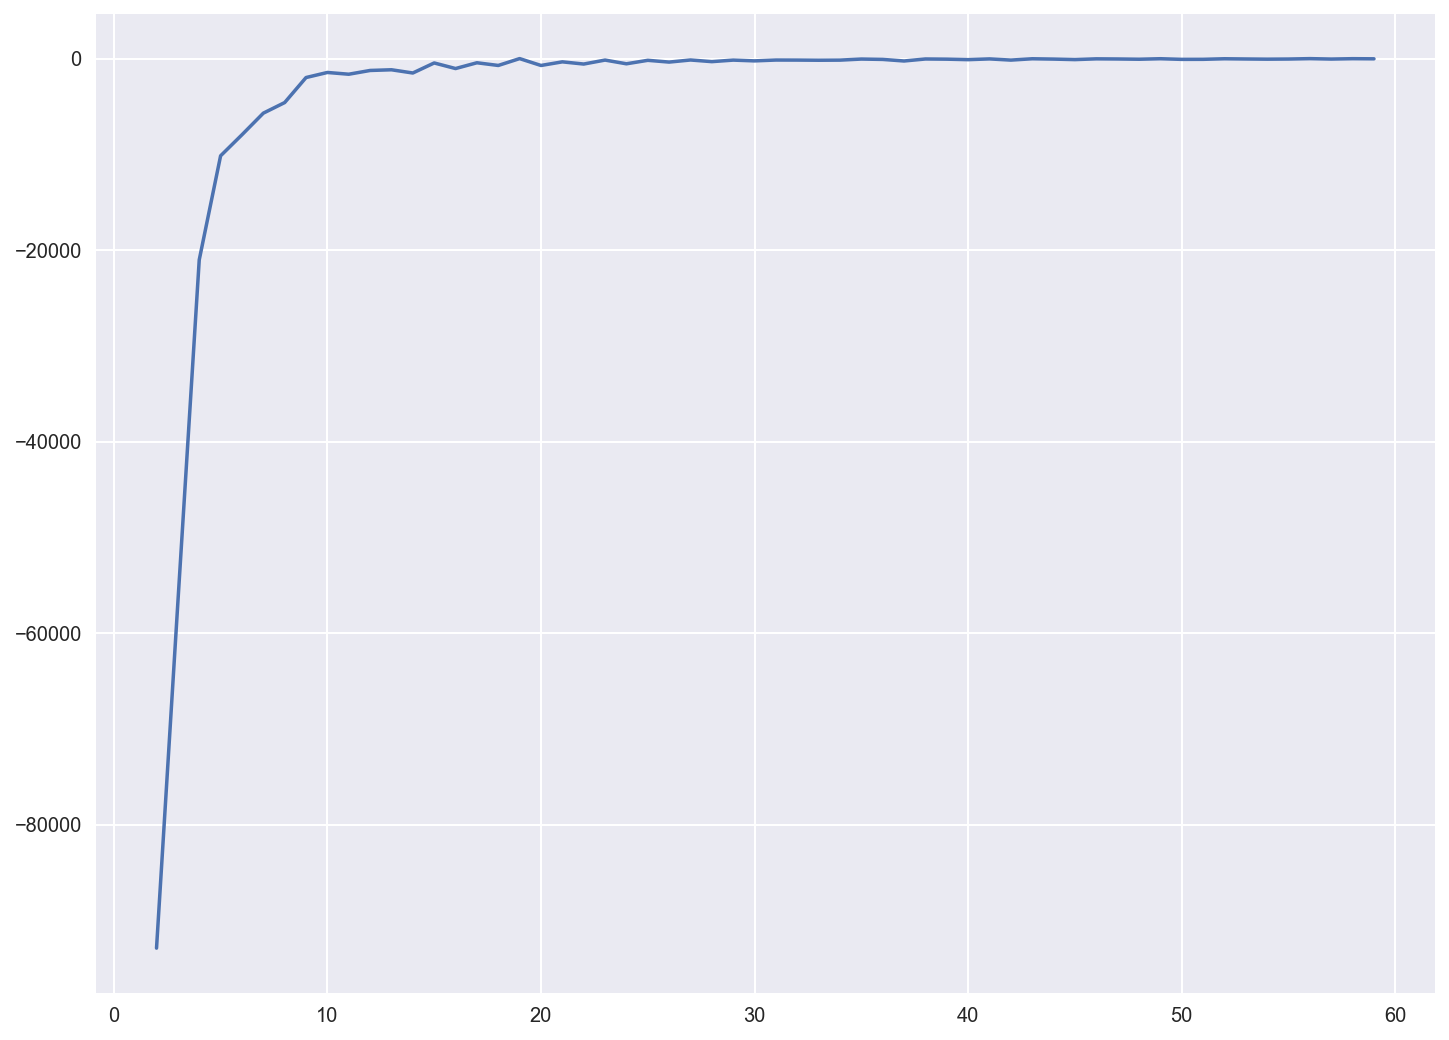

In [259]:
plt.plot(ks[1:], diff);

In [260]:
diff_r = diff[1:] / diff[:-1]

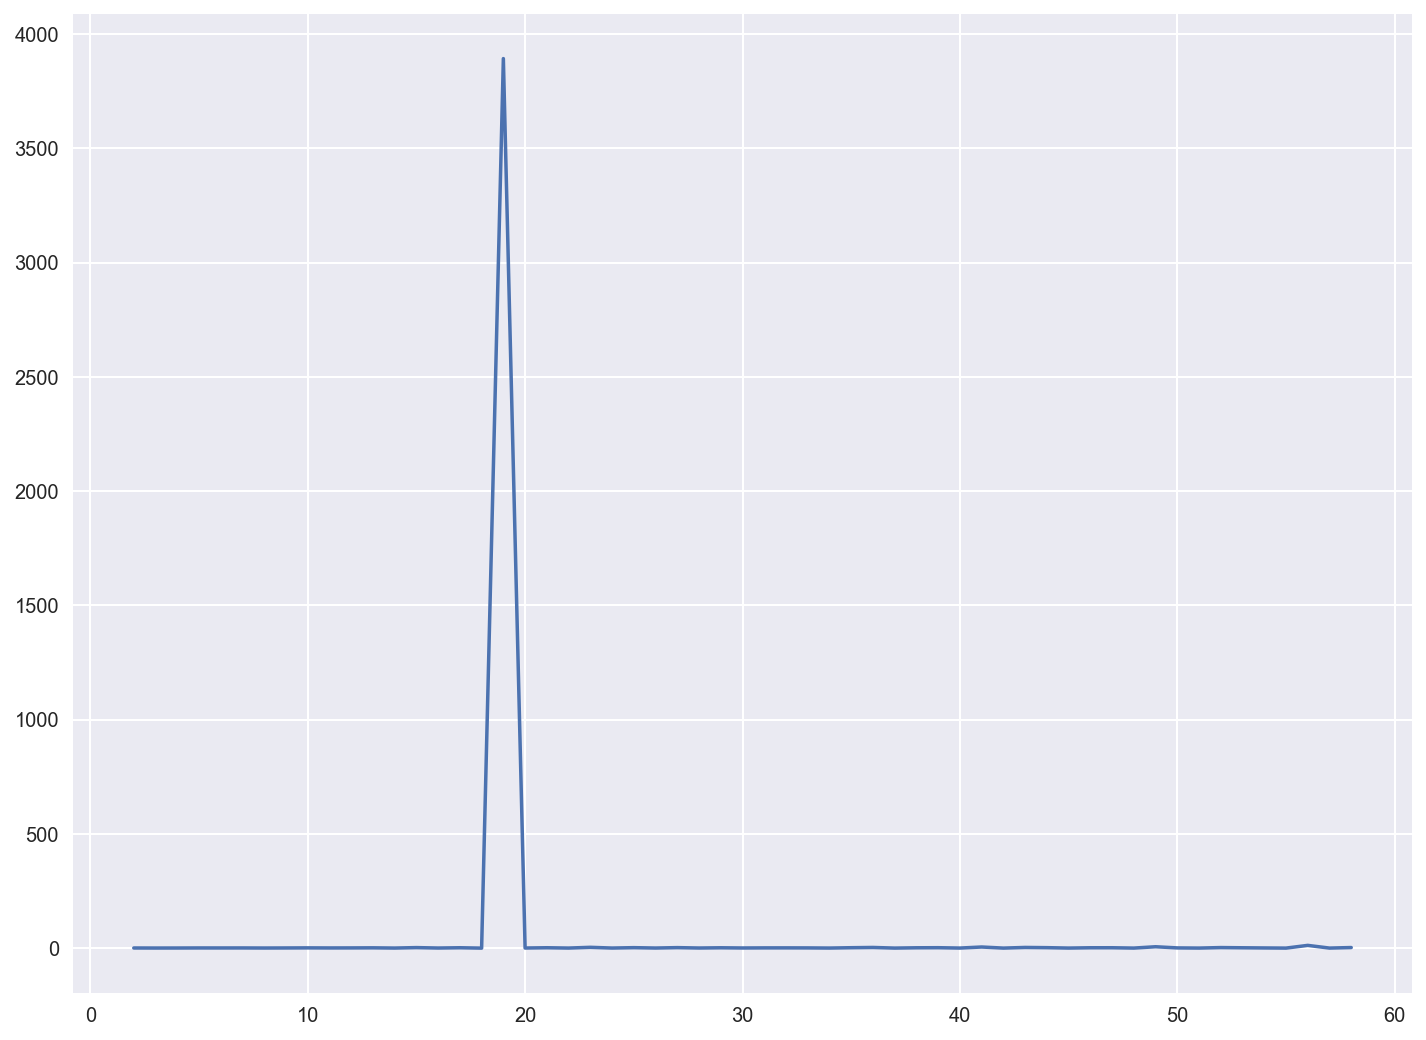

In [261]:
plt.plot(ks[1:-1], diff_r)

In [262]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

18